In [651]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np 
plt.style.use('ggplot')    

In [652]:
# для прочтения данных воспользуйтесь методом read_excel библиотеки pandas
data = pd.read_excel('C:/Users/rm70/Desktop/Programming for Data Science/rodionov_sergey.xlsx')
data.head()

,sex,ticket_origin,age,habitat,scene,preferences,reasons_for_visiting,impressions_whole,impressions_service,impressions_site,...,impressions_cafe,impressions_checkroom,impressions_interior,frequency_visits,frequency_visits_opera,freaquency_visita_ballet,freaquency_visits_drama,freaquency_visits_concerts,occupation,household_income
0,Мужской,в других театральных кассах,24,Москва,Историческая сцена,Балет,Выход в свет на красивое меропрятие,5,4,3,...,4,5,5,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Государственный служащий,150-250 тысяч рублей
1,Мужской,в других театральных кассах,19,Подмосковье и Новая Москва,Новая сцена,Балет,Желание посмотреть на Большой театр изнутри,4,4,3,...,Не могу оценить,4,5,Раз в год или реже,1-2 раза в квартал,1-2 раза в полгода,Вообще не посещаю,Вообще не посещаю,Учусь/ студент (ка),<50 тысяч рублeй
2,Женский,в других театральных кассах,41,Москва,Новая сцена,Балет,Выступление любимых исполнителей,4,4,2,...,3,5,5,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Сотрудник российской коммерческой организации,50-100 тысяч рублей
3,Женский,в других театральных кассах,33,Другой город России,Историческая сцена,Балет,Исполнение конкретного произведения,4,4,4,...,4,5,5,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Владелец собственого бизнеса,150-250 тысяч рублей
4,Женский,в других театральных кассах,42,Другой город России,Историческая сцена,Балет,Выступление любимых исполнителей,3,5,5,...,3,4,5,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Сотрудник российской коммерческой организации,50-100 тысяч рублей


In [653]:
data.isnull().sum()

sex                             0
ticket_origin                   0
age                             0
habitat                         0
scene                           0
preferences                     0
reasons_for_visiting            0
impressions_whole               0
impressions_service             0
impressions_site                0
frequency_social_media          0
passport_opinion                0
3_month_window                  0
souvenirs                       0
web_store                       0
picture_of_da_theater           0
free_lecture_prior              0
impressiona_plot_music          0
impressions_orchestra           0
impressions_cast                0
impressions_props               0
impressions_directing           0
impressions_cafe                0
impressions_checkroom           0
impressions_interior            0
frequency_visits                0
frequency_visits_opera          0
freaquency_visita_ballet        0
freaquency_visits_drama         0
freaquency_vis

In [654]:
pd.get_dummies(data['occupation'], dummy_na=True, drop_first=True).head()

,Владелец собственого бизнеса,Врач,Временно не работаю/ в декретном отпуске,Государственный служащий,Декоратор,Инвалид,Искусство,Менеджер сценического искусства,На пенсии,Преподаватель вокала,Работник культуры,Солист филармонии,Сотрудник иностранной коммерческой организации,Сотрудник российской коммерческой организации,Ученый,Учусь/ студент (ка),nan
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [655]:
target = 'Impressions_whole'  

to_kill = ['household_income', 'impressions_cafe']
categories = ['sex','ticket_origin', 'habitat','scene','preferences',
              'reasons_for_visiting','frequency_visits','frequency_visits_opera',
              'freaquency_visita_ballet','freaquency_visits_drama',
              'freaquency_visits_concerts','occupation','frequency_social_media',
              'passport_opinion','3_month_window','souvenirs','web_store',
              'picture_of_da_theater','free_lecture_prior',]              
continious = ['age', 'impressions_service', 'impressions_site','impressions_checkroom',
              'impressions_interior','impressiona_plot_music','impressions_orchestra',
              'impressions_cast','impressions_props','impressions_directing'] 

In [656]:
data = data.drop (['household_income'], axis=1)#слишком много пропусков#
data = data.drop (['impressions_cafe'], axis=1)

In [657]:
pd.get_dummies(data['frequency_visits'], dummy_na=True, drop_first=True).head()

,1-2 раза в месяц,1-2 раза в полгода,Был (а) когда-то,Раз в год или реже,Раз в неделю и чаще,nan
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [658]:
data[categories].head() 

,sex,ticket_origin,habitat,scene,preferences,reasons_for_visiting,frequency_visits,frequency_visits_opera,freaquency_visita_ballet,freaquency_visits_drama,freaquency_visits_concerts,occupation,frequency_social_media,passport_opinion,3_month_window,souvenirs,web_store,picture_of_da_theater,free_lecture_prior
0,Мужской,в других театральных кассах,Москва,Историческая сцена,Балет,Выход в свет на красивое меропрятие,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Государственный служащий,1-2 раза в месяц,скорее положительно – продажа по паспортам нео...,Что-то слышал(а) в общих чертах,Знаю и посещал(а),Затрудняюсь ответить,Option 3,Да
1,Мужской,в других театральных кассах,Подмосковье и Новая Москва,Новая сцена,Балет,Желание посмотреть на Большой театр изнутри,Раз в год или реже,1-2 раза в квартал,1-2 раза в полгода,Вообще не посещаю,Вообще не посещаю,Учусь/ студент (ка),1-2 раза в месяц,скорее положительно – продажа по паспортам нео...,Что-то слышал(а) в общих чертах,Не знаю,Скорее да,Option 1,Да
2,Женский,в других театральных кассах,Москва,Новая сцена,Балет,Выступление любимых исполнителей,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Сотрудник российской коммерческой организации,Никогда не заходил(а) в группы Большого Театра...,скорее положительно – продажа по паспортам нео...,"Да, мне это известно",Знаю и посещал(а),Затрудняюсь ответить,Option 3,Да
3,Женский,в других театральных кассах,Другой город России,Историческая сцена,Балет,Исполнение конкретного произведения,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Владелец собственого бизнеса,Никогда не заходил(а) в группы Большого Театра...,скорее положительно – продажа по паспортам нео...,"Да, мне это известно",Не знаю,Затрудняюсь ответить,Option 3,Да
4,Женский,в других театральных кассах,Другой город России,Историческая сцена,Балет,Выступление любимых исполнителей,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Сотрудник российской коммерческой организации,Никогда не заходил(а) в группы Большого Театра...,скорее положительно – продажа по паспортам нео...,Что-то слышал(а) в общих чертах,"Знаю, но не посещал(а)",Скорее да,Option 3,Да


In [659]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
sex                           3000 non-null object
ticket_origin                 3000 non-null object
age                           3000 non-null int64
habitat                       3000 non-null object
scene                         3000 non-null object
preferences                   3000 non-null object
reasons_for_visiting          3000 non-null object
impressions_whole             3000 non-null int64
impressions_service           3000 non-null int64
impressions_site              3000 non-null int64
frequency_social_media        3000 non-null object
passport_opinion              3000 non-null object
3_month_window                3000 non-null object
souvenirs                     3000 non-null object
web_store                     3000 non-null object
picture_of_da_theater         3000 non-null object
free_lecture_prior            3000 non-null object
impressiona_plot_music        

In [660]:
#the current acceptable bottomline is above 4# 
data.impressions_whole.replace([1,2,3,4,5],[0,0,0,1,1], inplace = True)

In [661]:
data.head()

,sex,ticket_origin,age,habitat,scene,preferences,reasons_for_visiting,impressions_whole,impressions_service,impressions_site,...,impressions_props,impressions_directing,impressions_checkroom,impressions_interior,frequency_visits,frequency_visits_opera,freaquency_visita_ballet,freaquency_visits_drama,freaquency_visits_concerts,occupation
0,Мужской,в других театральных кассах,24,Москва,Историческая сцена,Балет,Выход в свет на красивое меропрятие,1,4,3,...,4,4,5,5,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Государственный служащий
1,Мужской,в других театральных кассах,19,Подмосковье и Новая Москва,Новая сцена,Балет,Желание посмотреть на Большой театр изнутри,1,4,3,...,4,4,4,5,Раз в год или реже,1-2 раза в квартал,1-2 раза в полгода,Вообще не посещаю,Вообще не посещаю,Учусь/ студент (ка)
2,Женский,в других театральных кассах,41,Москва,Новая сцена,Балет,Выступление любимых исполнителей,1,4,2,...,4,4,5,5,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Сотрудник российской коммерческой организации
3,Женский,в других театральных кассах,33,Другой город России,Историческая сцена,Балет,Исполнение конкретного произведения,1,4,4,...,5,4,5,5,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Владелец собственого бизнеса
4,Женский,в других театральных кассах,42,Другой город России,Историческая сцена,Балет,Выступление любимых исполнителей,0,5,5,...,4,4,4,5,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Раз в год или реже,Сотрудник российской коммерческой организации


In [662]:
target = 'impressions_whole'

In [663]:
data_categories = pd.get_dummies(data[categories], dummy_na=True, drop_first=True)
data_categories.head()

,sex_Мужской,sex_nan,ticket_origin_в кассах Большого Театра,ticket_origin_на официальном сайте Bolshoi.ru,"ticket_origin_на сайтах официальных агентств (ticketland, parter, kassir и тд)","ticket_origin_на сайте перекупщика (bolshoi-tickets, bolshoi-theatre, bolshoi-teatr)",ticket_origin_получил(а) в подарок,ticket_origin_получил(а) по распределению,ticket_origin_с рук у знакомого,ticket_origin_с рук у перекупщика,...,web_store_Скорее да,web_store_Скорее нет,web_store_nan,picture_of_da_theater_Option 2,picture_of_da_theater_Option 3,picture_of_da_theater_Option 4,picture_of_da_theater_nan,free_lecture_prior_Затрудняюсь ответить,free_lecture_prior_Нет,free_lecture_prior_nan
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [664]:
data_continious = data[continious]
data_continious.head()


,age,impressions_service,impressions_site,impressions_checkroom,impressions_interior,impressiona_plot_music,impressions_orchestra,impressions_cast,impressions_props,impressions_directing
0,24,4,3,5,5,4,4,4,4,4
1,19,4,3,4,5,5,5,4,4,4
2,41,4,2,5,5,5,4,5,4,4
3,33,4,4,5,5,4,4,5,5,4
4,42,5,5,4,5,4,4,5,4,4


In [665]:
data = pd.concat([data[target],data_continious, data_categories], axis=1)
data.head()

,impressions_whole,age,impressions_service,impressions_site,impressions_checkroom,impressions_interior,impressiona_plot_music,impressions_orchestra,impressions_cast,impressions_props,...,web_store_Скорее да,web_store_Скорее нет,web_store_nan,picture_of_da_theater_Option 2,picture_of_da_theater_Option 3,picture_of_da_theater_Option 4,picture_of_da_theater_nan,free_lecture_prior_Затрудняюсь ответить,free_lecture_prior_Нет,free_lecture_prior_nan
0,1,24,4,3,5,5,4,4,4,4,...,0,0,0,0,1,0,0,0,0,0
1,1,19,4,3,4,5,5,5,4,4,...,1,0,0,0,0,0,0,0,0,0
2,1,41,4,2,5,5,5,4,5,4,...,0,0,0,0,1,0,0,0,0,0
3,1,33,4,4,5,5,4,4,5,5,...,0,0,0,0,1,0,0,0,0,0
4,0,42,5,5,4,5,4,4,5,4,...,1,0,0,0,1,0,0,0,0,0


In [666]:
data.isnull().sum()

impressions_whole                                                                                                          0
age                                                                                                                        0
impressions_service                                                                                                        0
impressions_site                                                                                                           0
impressions_checkroom                                                                                                      0
impressions_interior                                                                                                       0
impressiona_plot_music                                                                                                     0
impressions_orchestra                                                                                                      0


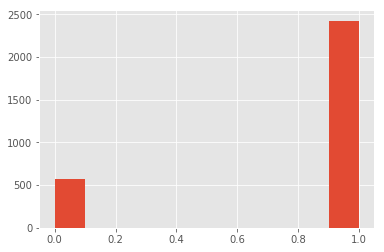

In [667]:
data.impressions_whole.hist() # 1 - positive, 0 - negative#

In [668]:
A = data['impressions_whole'].values
B = data.drop('impressions_whole',axis=1).values
A.shape, B.shape

((3000,), (3000, 117))

In [669]:
from sklearn.model_selection import train_test_split

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3, random_state=42)

print (A_train.shape, B_train.shape)
print (A_test.shape, B_test.shape)

(2100,) (2100, 117)
(900,) (900, 117)


In [670]:
from sklearn.neighbors import KNeighborsClassifier# nearest neighbour#

clf_knn = KNeighborsClassifier(n_neighbors=60)
clf_knn.fit(B_train, A_train)

SyntaxError: invalid syntax (<ipython-input-670-33d6b333d5c2>, line 4)

In [ ]:
A_predicted = clf_knn.predict(B_test)
A_predicted

In [671]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy =', accuracy_score(A_test, A_predicted))
print('Precision =', precision_score(A_test, A_predicted))
print('Recall =', recall_score(A_test, A_predicted))
print('F1_score =', f1_score(A_test, A_predicted))

Accuracy = 0.8222222222222222
Precision = 0.8202247191011236
Recall = 1.0
F1_score = 0.9012345679012346


In [672]:
A_probe = clf_knn.predict_proba(B_test)
A_probe[:10]

array([[0.18236473, 0.81763527],
       [0.18637275, 0.81362725],
       [0.19038076, 0.80961924],
       [0.18837675, 0.81162325],
       [0.19839679, 0.80160321],
       [0.18837675, 0.81162325],
       [0.19038076, 0.80961924],
       [0.18236473, 0.81763527],
       [0.19438878, 0.80561122],
       [0.20641283, 0.79358717]])

In [673]:
A_predicted = (A_probe[:,1] >= 0.6)
A_predicted[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

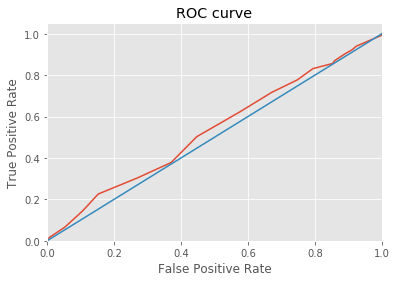

In [674]:
from sklearn.metrics import roc_auc_score, roc_curve 
fpr, tpr, thresholds = roc_curve(A_test, A_probe[:,1])
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [675]:
print('AUC =', roc_auc_score(A_test, A_probe[:,1]))#meh!#

AUC = 0.5330781627719582


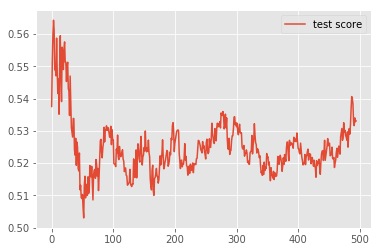

In [676]:
rocauc_train = [ ]
rocauc_test = [ ]

for k in range(5,500):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    clf_knn.fit(B_train, A_train)
    
    # Ошибка на тестовой выборке 
    A_probe = clf_knn.predict_proba(B_test)
    rocauc_test.append(roc_auc_score(A_test, A_probe[:,1]))
    
plt.plot(rocauc_test, label='test score')
plt.legend()

In [677]:
max(rocauc_test)

0.5642788074133763

In [678]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()     
clf_tree.fit(B_train, A_train)          
A_predicted = clf_tree.predict(B_test)  
A_proba = clf_tree.predict_proba(B_test)

In [679]:
print('Accuracy =', accuracy_score(A_test, A_predicted))
print('Precision =', precision_score(A_test, A_predicted))
print('Recall =', recall_score(A_test, A_predicted))
print('F1_score =', f1_score(A_test, A_predicted))


Accuracy = 0.6788888888888889
Precision = 0.813655761024182
Recall = 0.7835616438356164
F1_score = 0.7983251919050942


AUC = 0.5330781627719582


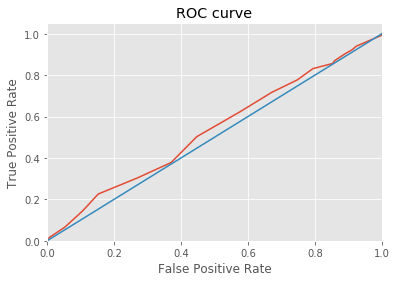

In [680]:
print('AUC =', roc_auc_score(A_test, A_probe[:,1]))


plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [681]:
from sklearn.ensemble import RandomForestClassifier

In [682]:
rfc = RandomForestClassifier(n_estimators=10) 
rfc.fit(B_train, A_train)
y_predicted = rfc.predict(B_test)
y_proba = rfc.predict_proba(B_test)

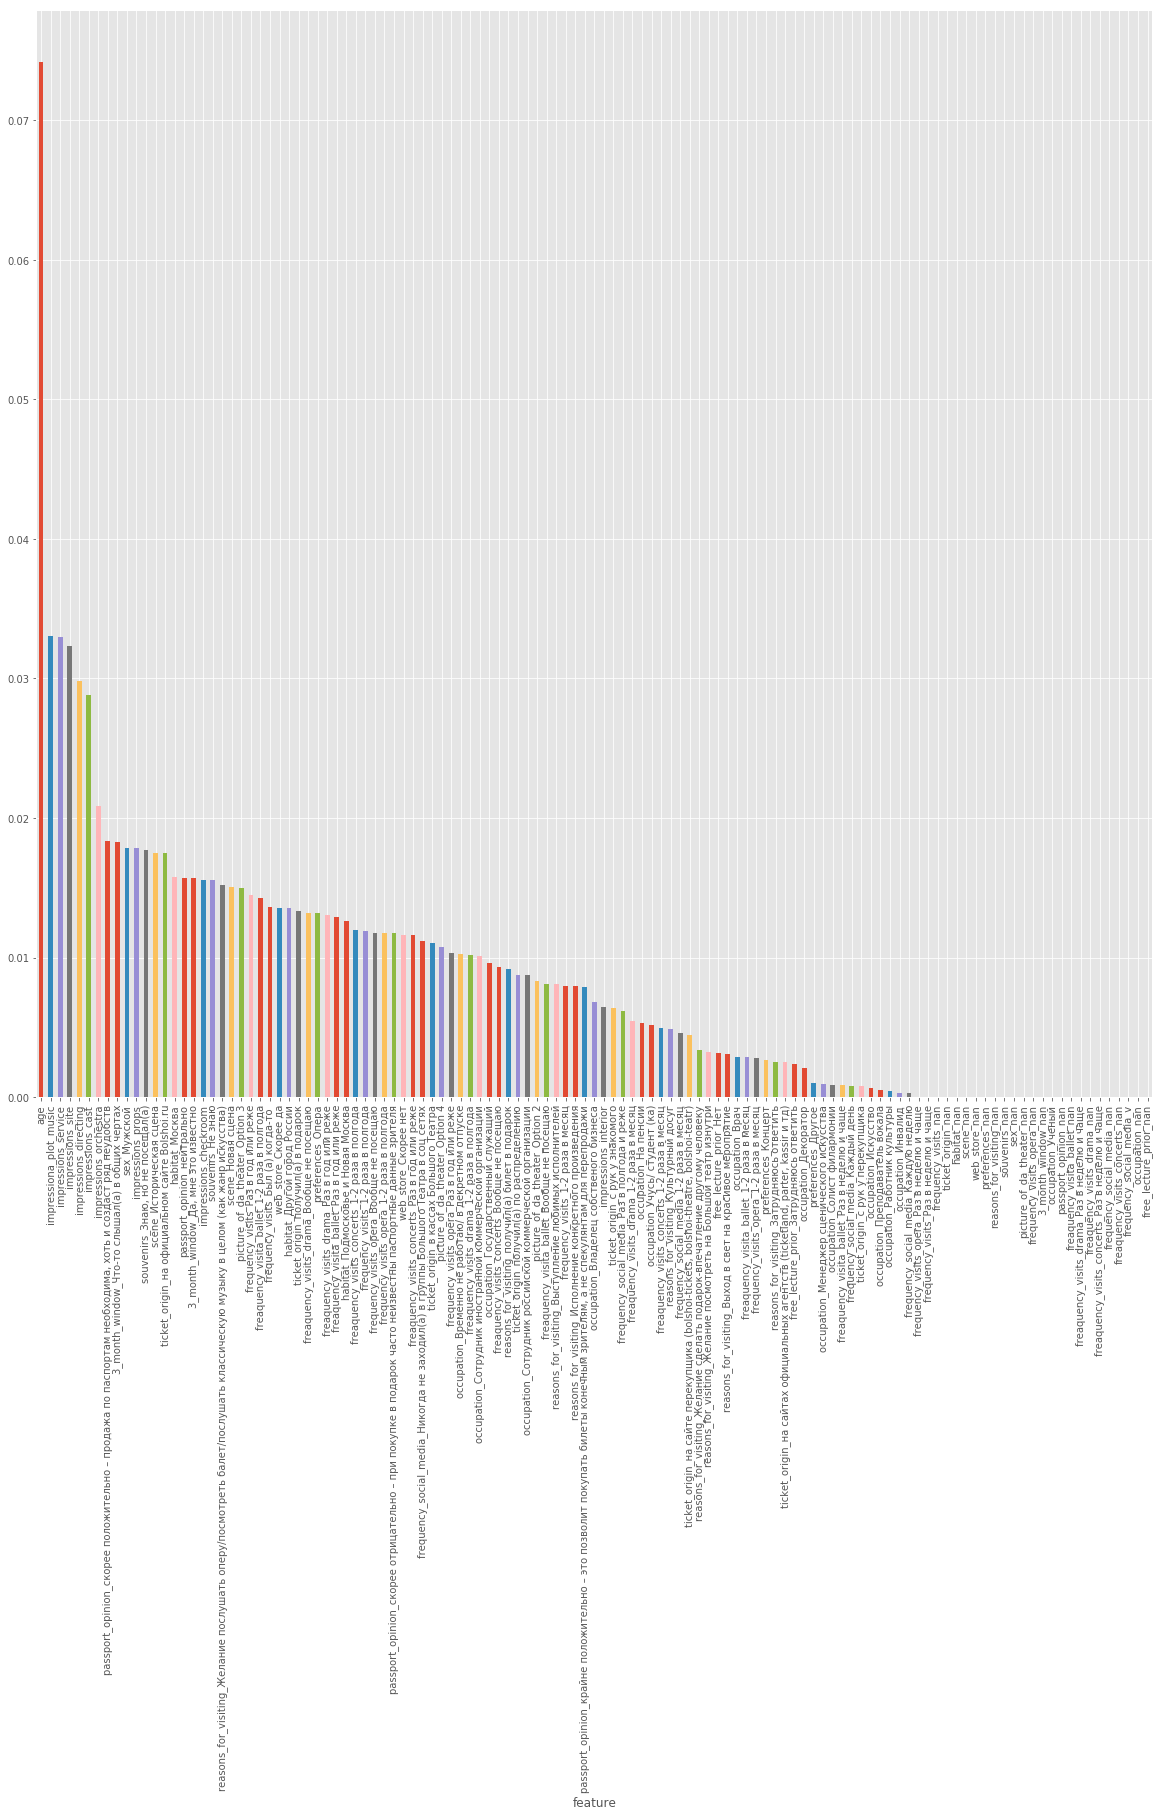

In [683]:
featureImportance = pd.DataFrame({"feature": data.drop('impressions_whole',axis=1).columns, 
                                  "importance": rfc.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(20,20))

In [684]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':range(5, 100), 'weights':['uniform', 'distance']}

knc = KNeighborsClassifier()

clf = GridSearchCV(knc, parameters)

clf.fit(B_train, A_train)
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [685]:
A_proba = clf.predict_proba(B_test)[:,1]
print('AUC =', roc_auc_score(A_test, A_proba))

AUC = 0.5542103142626914


In [686]:
parameters = {
              'n_estimators': [10,20,50,70,100],          
              'min_samples_leaf': [1, 3, 5, 7, 10],       
             }

rfc = RandomForestClassifier(random_state=42)   

gcv = GridSearchCV(rfc, parameters, n_jobs= -1) 
gcv.fit(B, A)
gcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [687]:
A_predicted = gcv.predict(B_test)
A_probe = gcv.predict_proba(B_test)

In [688]:
A_probe = clf.predict_proba(B_test)[:,1]
print('AUC =', roc_auc_score(A_test, A_proba))

AUC = 0.5542103142626914


In [690]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(B_train, A_train)
logit.predict_proba(B_test)
logit.predict(B_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

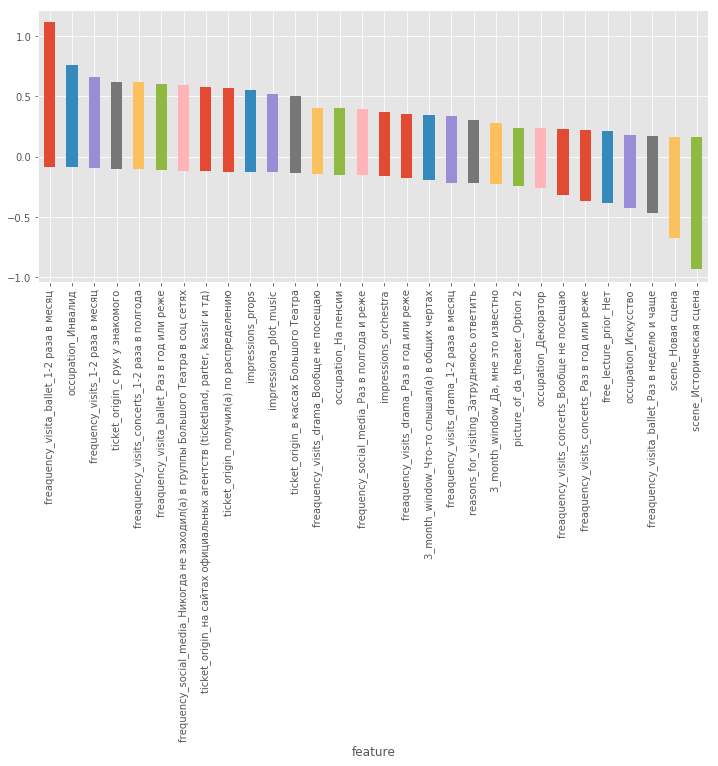

In [691]:
featureImportance = pd.DataFrame({"feature": data.drop('impressions_whole',axis=1).columns, 
"importance": logit.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].head(30).plot('bar', figsize=(12,5))
featureImportance["importance"].tail(30).plot('bar', figsize=(12,5))

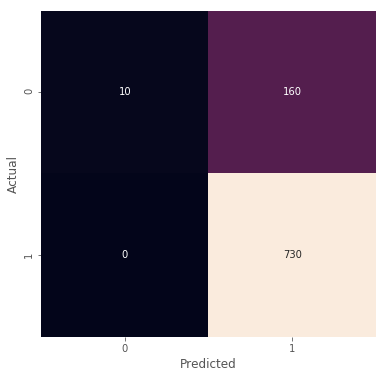

In [693]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix 
array = confusion_matrix(A_test, A_predicted) 
df_cm = pd.DataFrame(array) 
plt.figure(figsize = (6,6)) 
sns.heatmap(df_cm, annot=True, fmt='g', cbar=False) 
plt.ylabel("Actual") 
plt.xlabel("Predicted");